## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [19]:
a = np.array([[2,3,4],[3,5,4]])
print('原始維度: ', a.shape)
pd.DataFrame(a)

原始維度:  (2, 3)


,0,1,2
0,2,3,4
1,3,5,4


In [30]:
print('用了newaxisd的維度: ',a[:,np.newaxis,:].shape)
print(a[:,np.newaxis,1])

用了newaxisd的維度:  (2, 1, 3)
[[3]
 [5]]


In [26]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [75]:
Boston = datasets.load_boston()
boston = pd.DataFrame(Boston.data, columns = Boston.feature_names)
medv = pd.DataFrame(Boston.target, columns = ['medv'])
boston = pd.concat([boston, medv], axis = 1)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### 觀察住宅房間數量是否有跟房價有關

In [76]:
RM = Boston.data[:,np.newaxis,5]
medv = Boston.target
train_X,test_X,train_y,test_y = train_test_split(RM, medv, random_state = 10, test_size = 0.2)
reg = linear_model.LinearRegression()
regfit = reg.fit(train_X, train_y)

In [84]:
r2_score(pred_y, test_y)

0.013055179370974002

#### 由圖可以看到房間數量跟房價沒有太大的相關性

R-squared: 0.0131


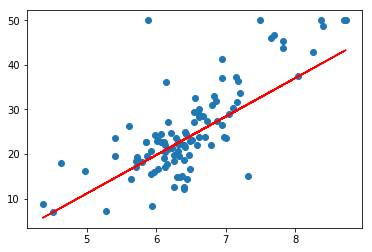

In [87]:
pred_y = regfit.predict(test_X)
plt.scatter(test_X,test_y)
plt.plot(test_X,pred_y, color = 'r')
print('R-squared: %0.4f' %r2_score(pred_y, test_y))
plt.show()